<a href="https://colab.research.google.com/github/prernasinghal88/Are-you-sure-to-Insure-/blob/version-1/Insurer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [4]:
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "train.csv" with length 4031315 bytes


In [0]:
import io

In [7]:
df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
print(df.head())

      ID Agency    Agency Type  ... Commision (in value) Gender  Age
0   3433    CWT  Travel Agency  ...                17.82    NaN   31
1   4339    EPX  Travel Agency  ...                 0.00    NaN   36
2  34590    CWT  Travel Agency  ...                11.88    NaN   75
3  55816    EPX  Travel Agency  ...                 0.00    NaN   32
4  13816    EPX  Travel Agency  ...                 0.00    NaN   29

[5 rows x 12 columns]


In [8]:
df.dtypes

ID                        int64
Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                     int64
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [10]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

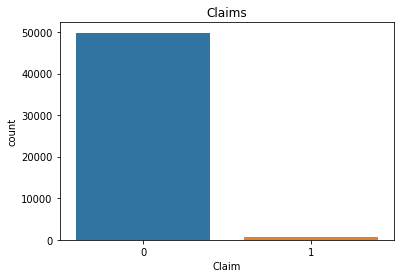

In [11]:
sns.countplot('Claim',data=df)
plt.title('Claims')
plt.show()

In [12]:
df.groupby(['Product Name','Claim'])['Claim'].count()

Product Name                          Claim
1 way Comprehensive Plan              0         2640
                                      1            8
2 way Comprehensive Plan              0        10371
                                      1          111
24 Protect                            0          199
Annual Gold Plan                      0          131
                                      1           17
Annual Silver Plan                    0         1028
                                      1          128
Annual Travel Protect Gold            0           71
                                      1           10
Annual Travel Protect Platinum        0           44
                                      1            1
Annual Travel Protect Silver          0           69
                                      1            4
Basic Plan                            0         4357
                                      1           19
Bronze Plan                           0         3084
  

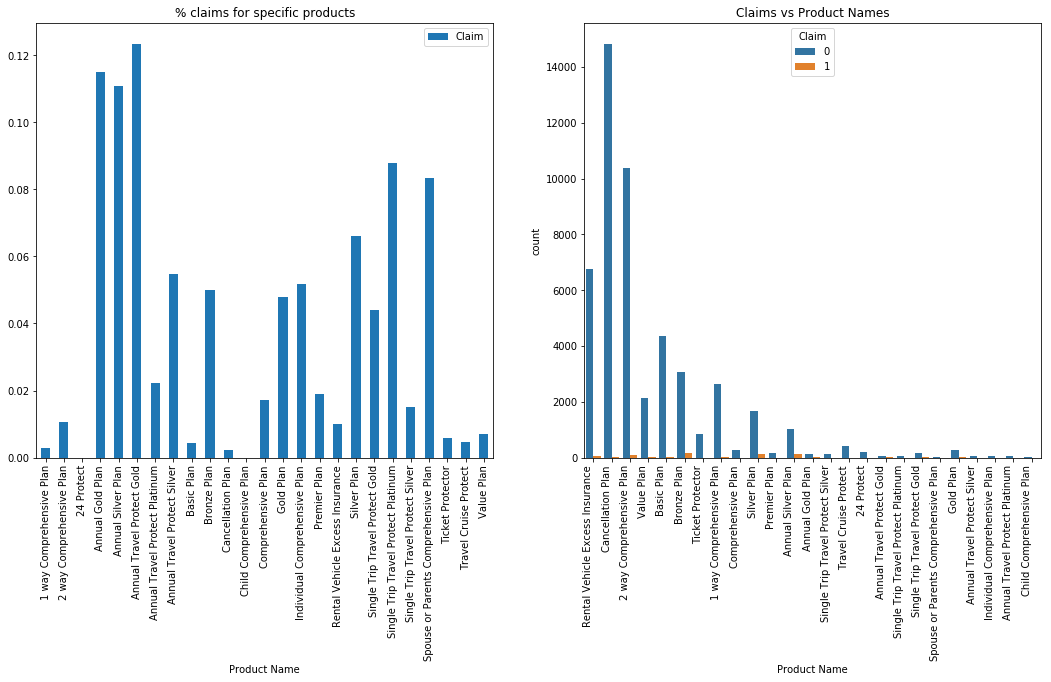

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Product Name','Claim']].groupby(['Product Name']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for specific products')
sns.countplot('Product Name',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs Product Names')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [14]:
df.groupby(['Agency Type','Claim'])['Claim'].count()

Agency Type    Claim
Airlines       0        13504
               1          474
Travel Agency  0        36308
               1          267
Name: Claim, dtype: int64

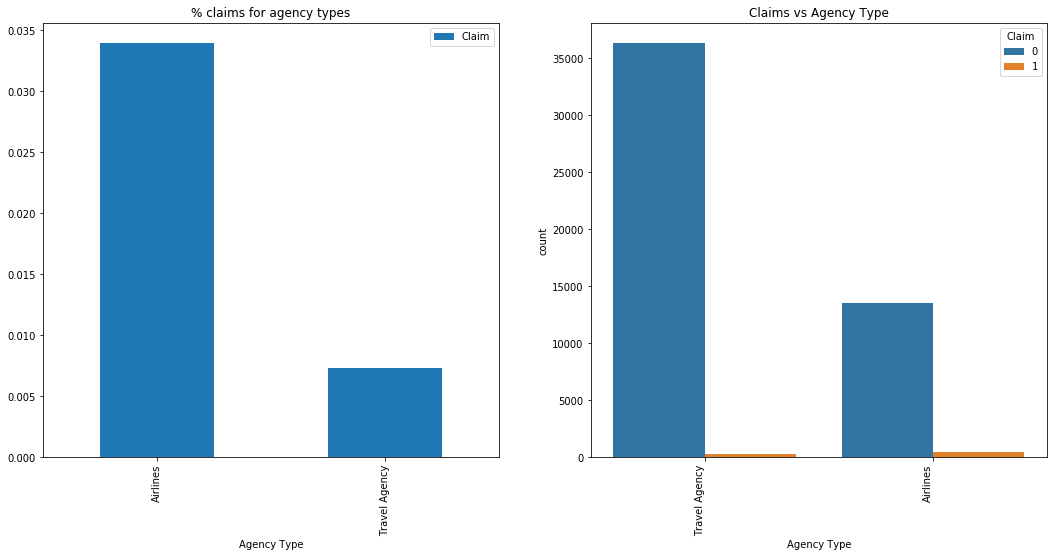

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Agency Type','Claim']].groupby(['Agency Type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for agency types')
sns.countplot('Agency Type',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs Agency Type')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


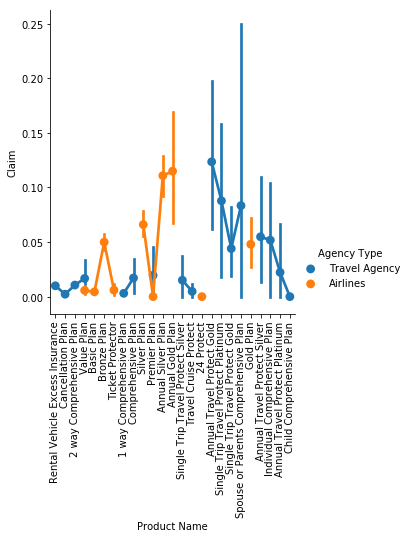

In [18]:
sns.factorplot('Product Name','Claim',hue='Agency Type',data=df)
plt.xticks(rotation= 90)
plt.show()

In [19]:
df.groupby(['Distribution Channel','Claim'])['Claim'].count()

Distribution Channel  Claim
Offline               0          871
                      1           17
Online                0        48941
                      1          724
Name: Claim, dtype: int64

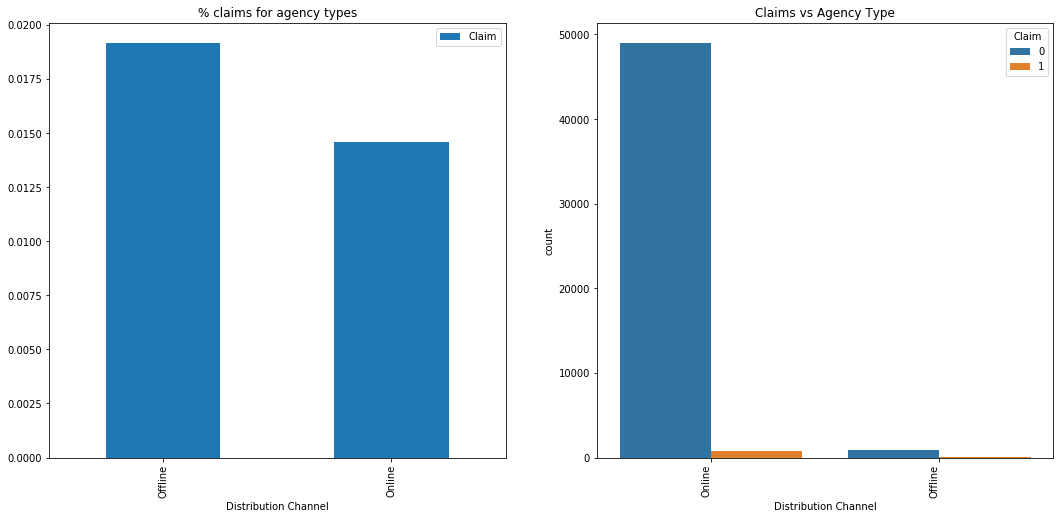

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Distribution Channel','Claim']].groupby(['Distribution Channel']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for agency types')
sns.countplot('Distribution Channel',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs Agency Type')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


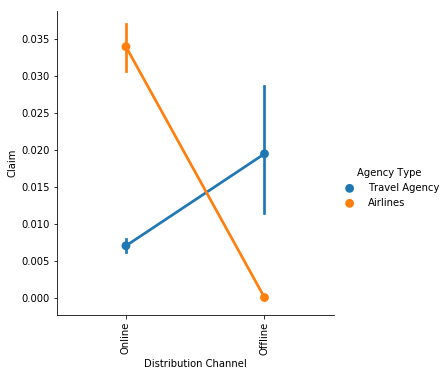

In [21]:
sns.factorplot('Distribution Channel','Claim',hue='Agency Type',data=df)
plt.xticks(rotation= 90)
plt.show()

In [27]:
pd.crosstab([df['Distribution Channel'],df['Agency Type'],df['Claim']],df['Product Name'],margins=True)

Product Name                              1 way Comprehensive Plan  ...    All
Distribution Channel Agency Type   Claim                            ...       
Offline              Airlines      0                             0  ...     14
                     Travel Agency 0                             2  ...    857
                                   1                             2  ...     17
Online               Airlines      0                             0  ...  13490
                                   1                             0  ...    474
                     Travel Agency 0                          2638  ...  35451
                                   1                             6  ...    250
All                                                           2648  ...  50553

[8 rows x 26 columns]

In [29]:
print('Maximum net sales :',df['Net Sales'].max())
print('Minimum Net sales :',df['Net Sales'].min())
print('Average Net Sales :',df['Net Sales'].mean())

Maximum net sales : 810.0
Minimum Net sales : -389.0
Average Net Sales : 40.80097659881748


In [34]:
#sum(n == 0 for n in df['Net Sales'])
df['Net Sales'][df['Net Sales'] < 0] = 0

2017

In [31]:
print('Maximum net sales :',df['Net Sales'].max())
print('Minimum Net sales :',df['Net Sales'].min())
print('Average Net Sales :',df['Net Sales'].mean())

Maximum net sales : 810.0
Minimum Net sales : 0.0
Average Net Sales : 41.42664906138154


[18.0, 12.0]


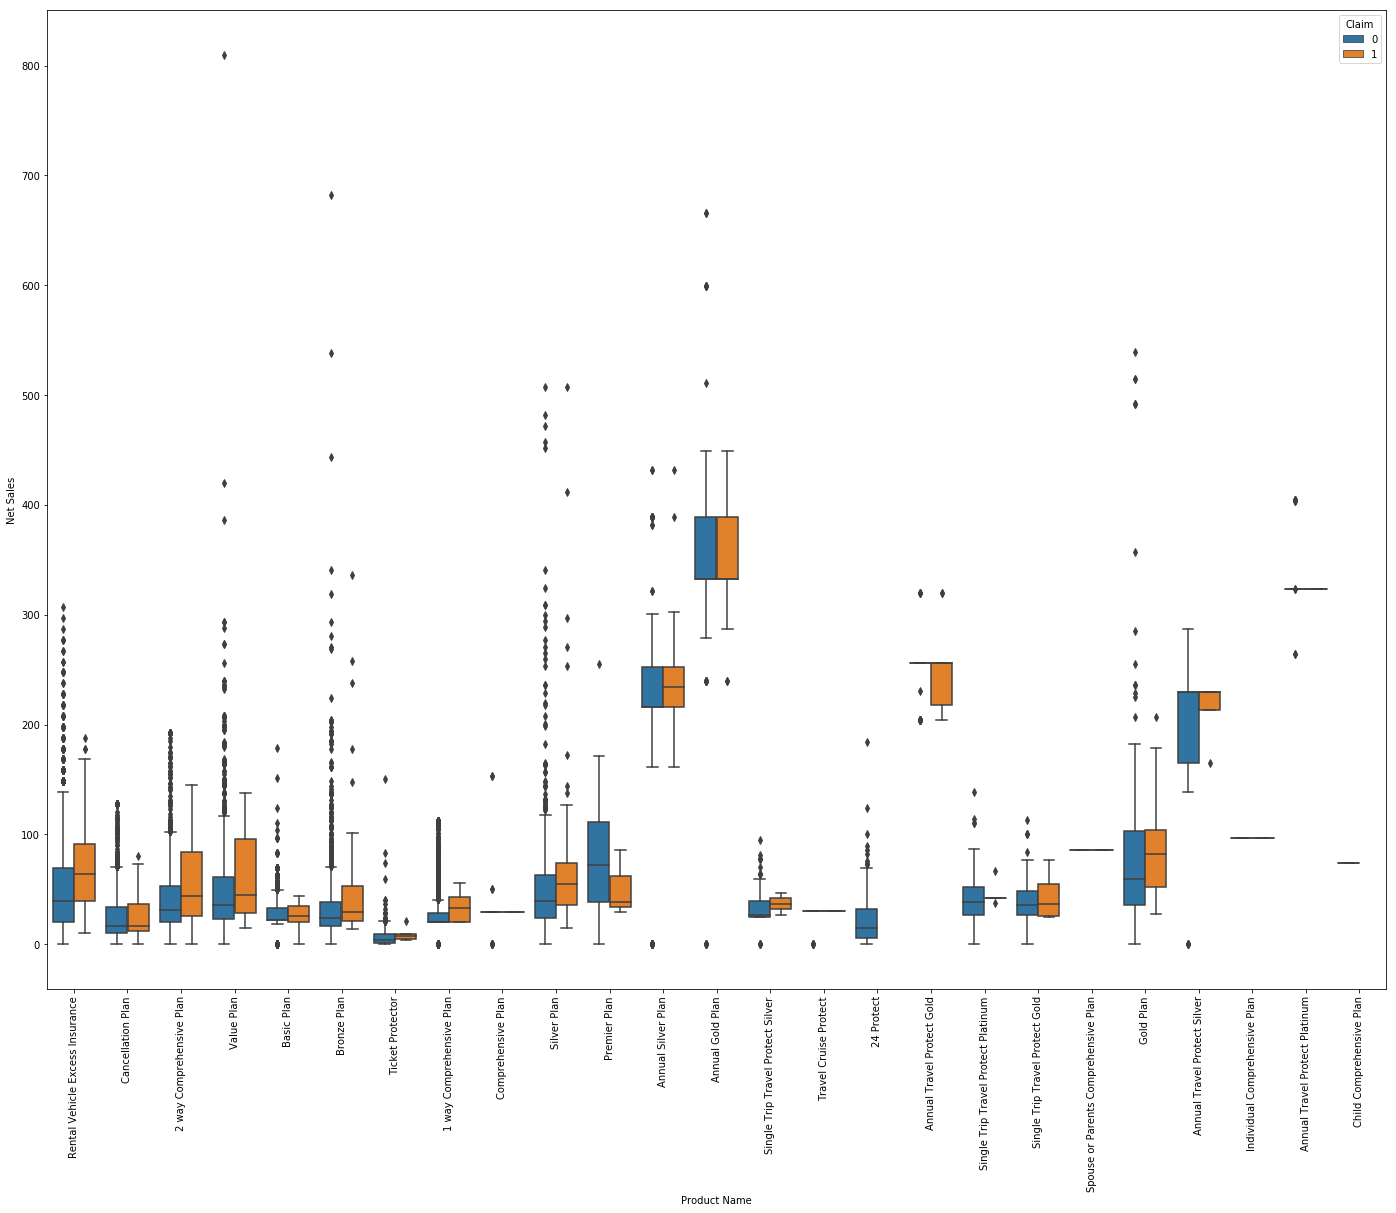

In [38]:

fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

fig_size[0] = 24
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

sns.boxplot(x = 'Product Name', y = 'Net Sales',hue='Claim' ,data = df) 
plt.xticks(rotation= 90)
plt.show()

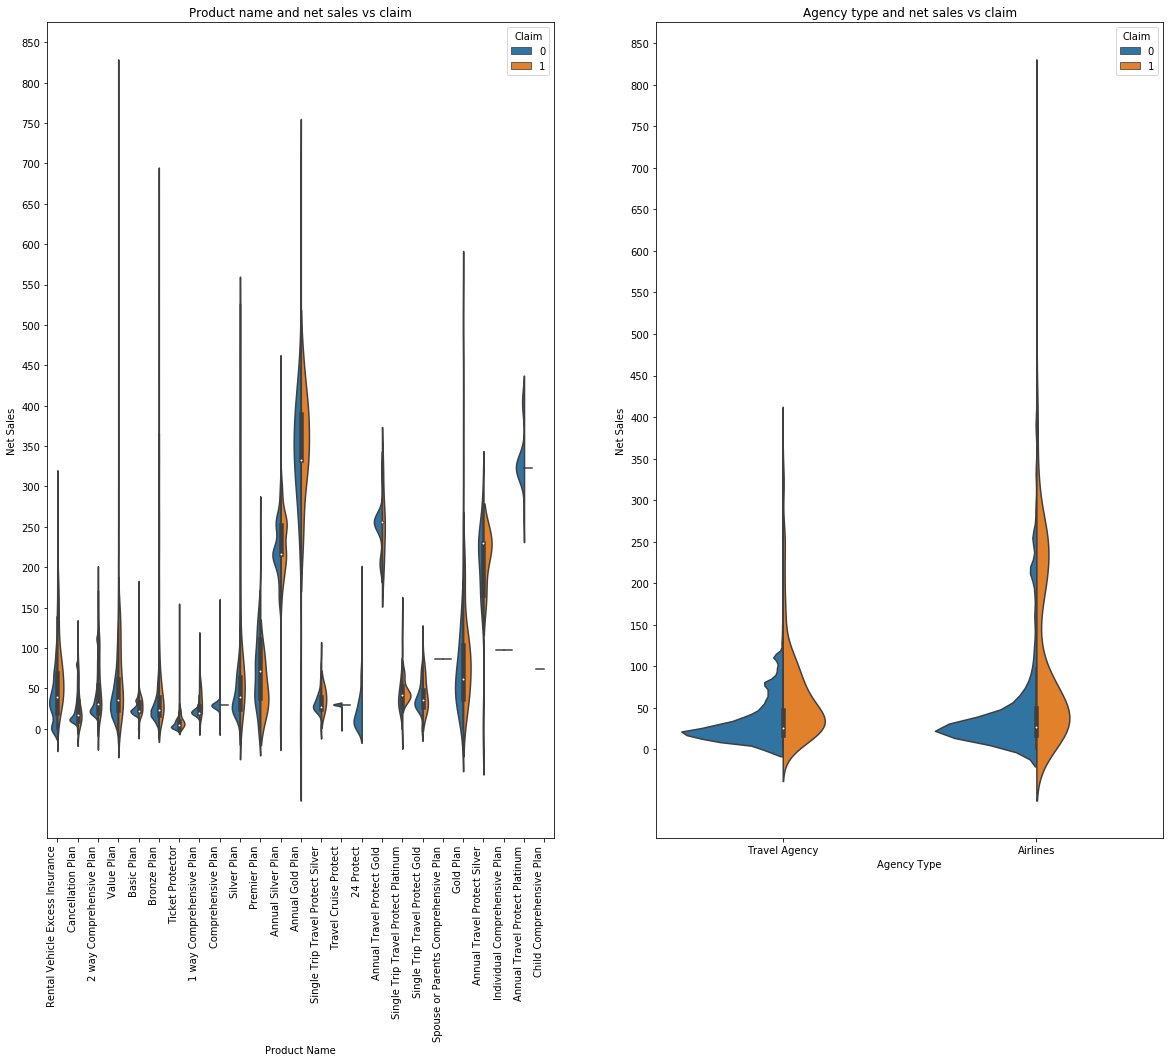

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,15))
sns.violinplot("Product Name","Net Sales", hue="Claim", data=df,split=True,ax=ax[0])
ax[0].set_title('Product name and net sales vs claim')
ax[0].set_yticks(range(0,900,50))
sns.violinplot("Agency Type","Net Sales", hue="Claim", data=df,split=True,ax=ax[1])
ax[1].set_title('Agency type and net sales vs claim')
ax[1].set_yticks(range(0,900,50))
plt.setp(ax[0].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()